AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd


url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)



first_10_rows = titanic_df.head(10)


last_20_rows = titanic_df.tail(20)


dataset_info = titanic_df.info()


dataset_description = titanic_df.describe()


print("First 10 rows of the dataset:")
print(first_10_rows.to_string(index=False))
print("\nLast 20 rows of the dataset:")
print(last_20_rows.to_string(index=False))
print("\nDataset Information:")
print(dataset_info)
print("\nDataset Description:")
print(dataset_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
First 10 rows of the dataset:
 PassengerId  Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1         0       3                             Braund

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


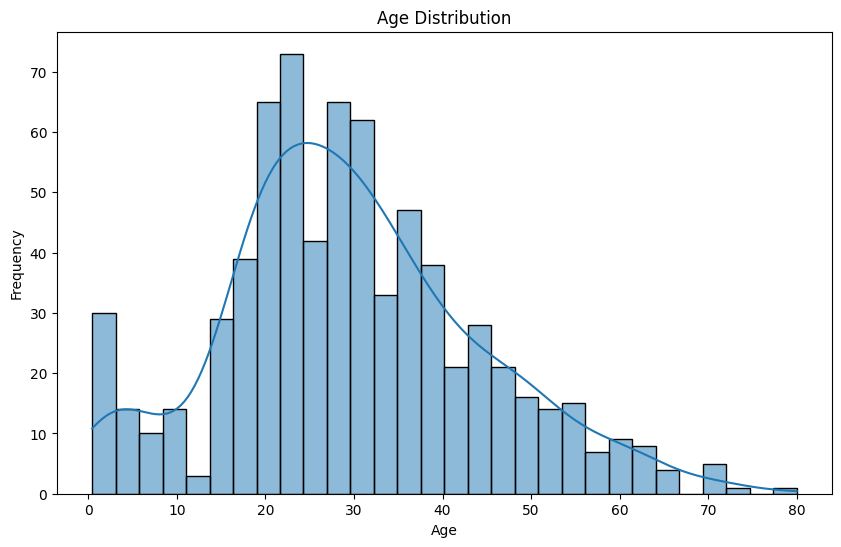

Median age: 28.0
Incorrect 'Survived' values:
      PassengerId Survived  Pclass  \
0              1        0       3   
1              2        1       1   
2              3        1       3   
3              4        1       1   
4              5        0       3   
..           ...      ...     ...   
886          887        0       2   
887          888        1       1   
888          889        0       3   
889          890        1       1   
890          891        0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                

C:\Users\LEGION\AppData\Local\Temp\ipykernel_11900\247005309.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_median, inplace=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_11900\247005309.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



titanic_df = pd.read_csv("titanic.csv")


missing_values = titanic_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


age_median = titanic_df['Age'].median()
print("Median age:", age_median)


titanic_df['Age'].fillna(age_median, inplace=True)


titanic_df.drop(columns=['Cabin'], inplace=True)


embarked_mode = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(embarked_mode, inplace=True)


incorrect_survived = titanic_df[~titanic_df['Survived'].isin([0, 1])]
print("Incorrect 'Survived' values:\n", incorrect_survived)




titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')


fare_median = titanic_df['Fare'].median()
titanic_df['Fare'].fillna(fare_median, inplace=True)


print("\nCleaned dataset information:")
print(titanic_df.info())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare grouped by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


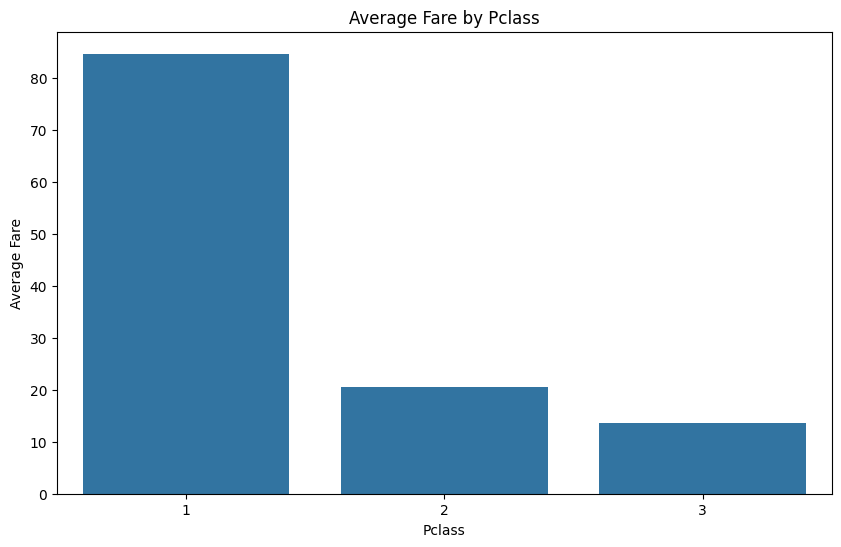

Average fare grouped by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


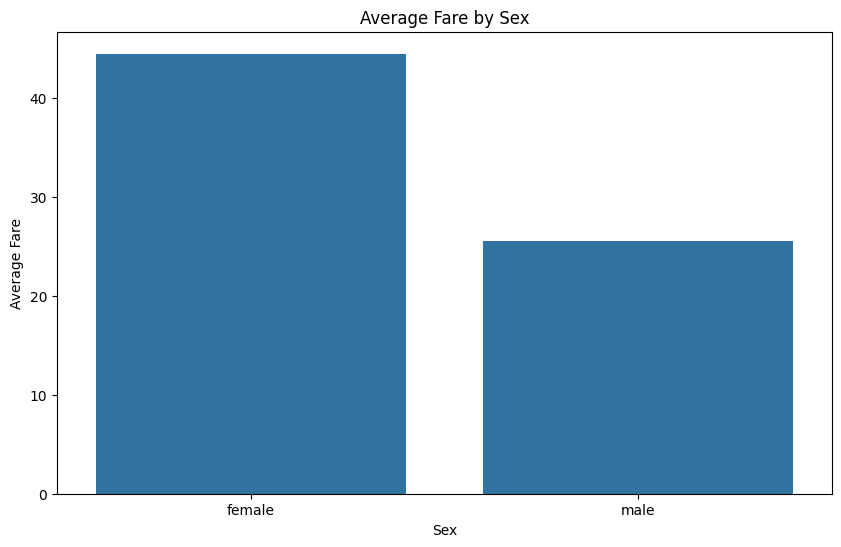

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



titanic_df = pd.read_csv("titanic.csv")

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')




average_fare_by_pclass = titanic_df.groupby('Pclass')['Fare'].mean(numeric_only=True)
print("Average fare grouped by Pclass:\n", average_fare_by_pclass)


plt.figure(figsize=(10, 6))
sns.barplot(x=average_fare_by_pclass.index, y=average_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

average_fare_by_sex = titanic_df.groupby('Sex')['Fare'].mean(numeric_only=True)
print("Average fare grouped by Sex:\n", average_fare_by_sex)


plt.figure(figsize=(10, 6))
sns.barplot(x=average_fare_by_sex.index, y=average_fare_by_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

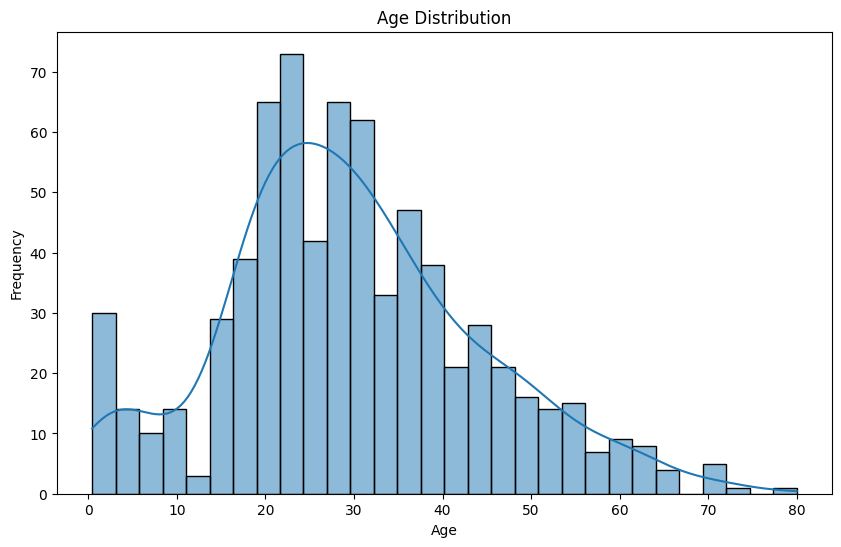

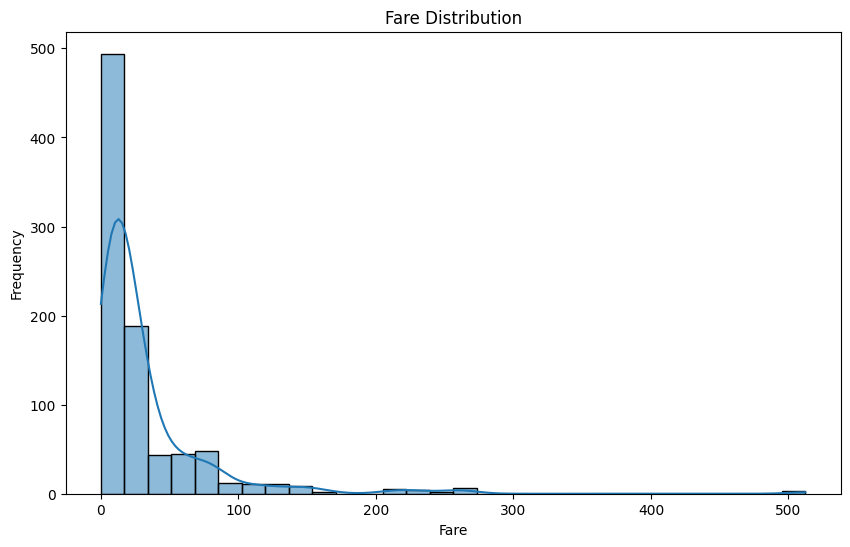

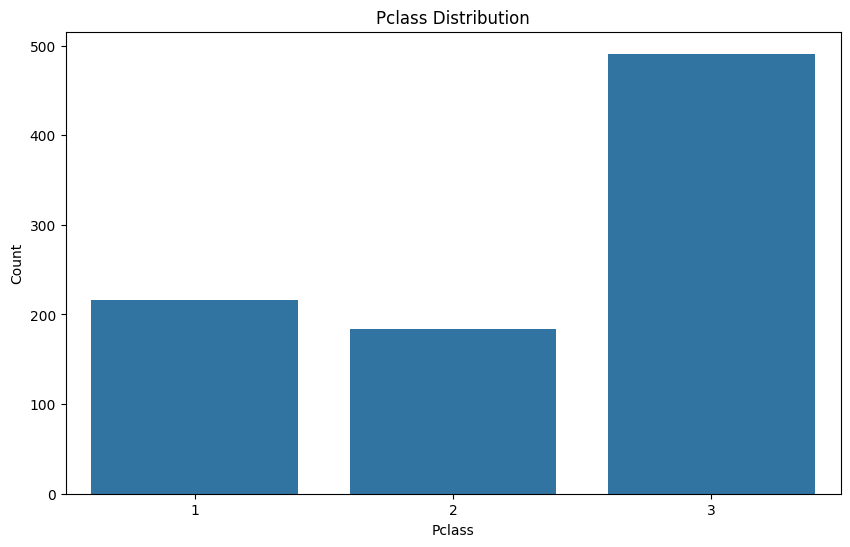

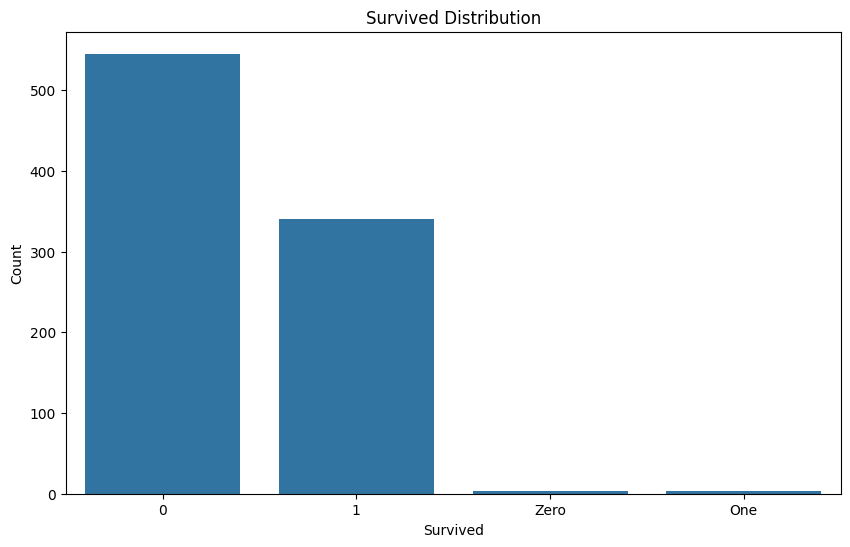

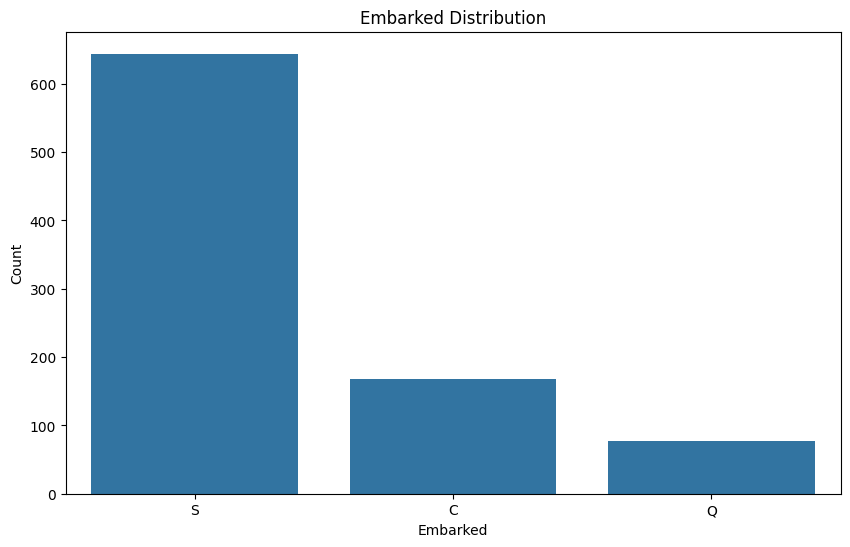

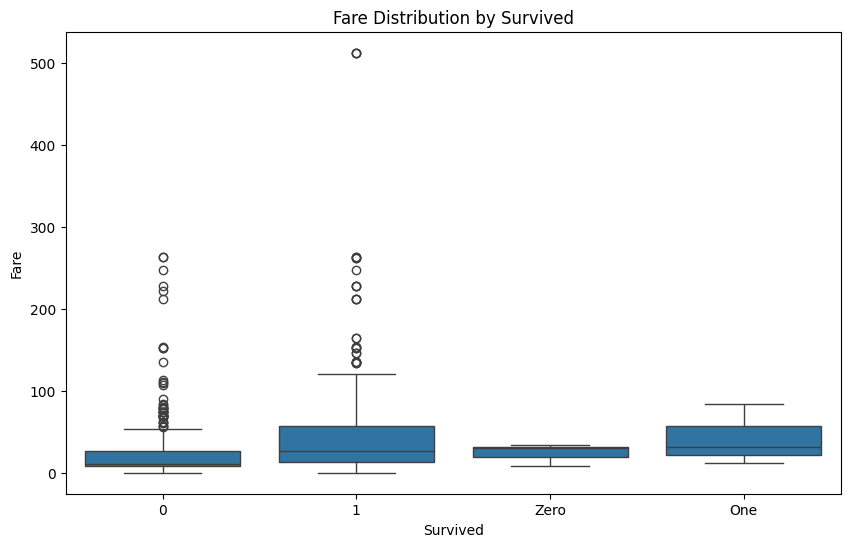

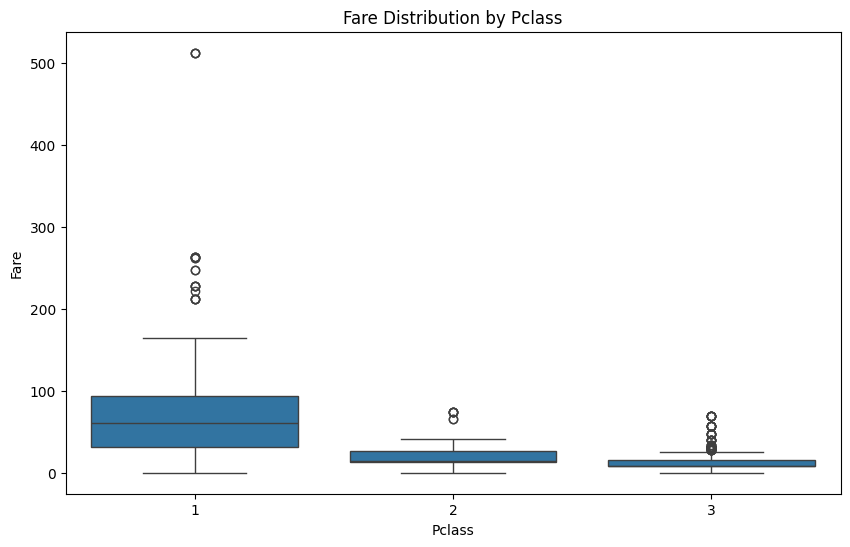

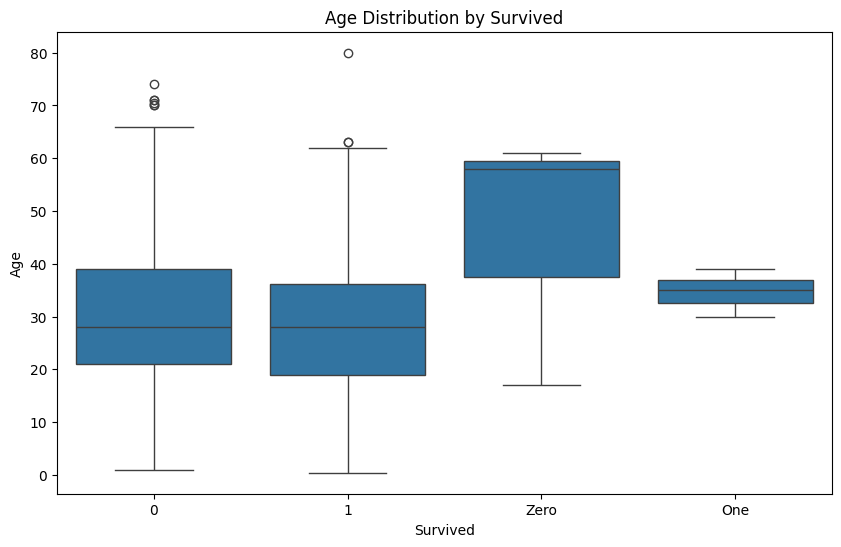

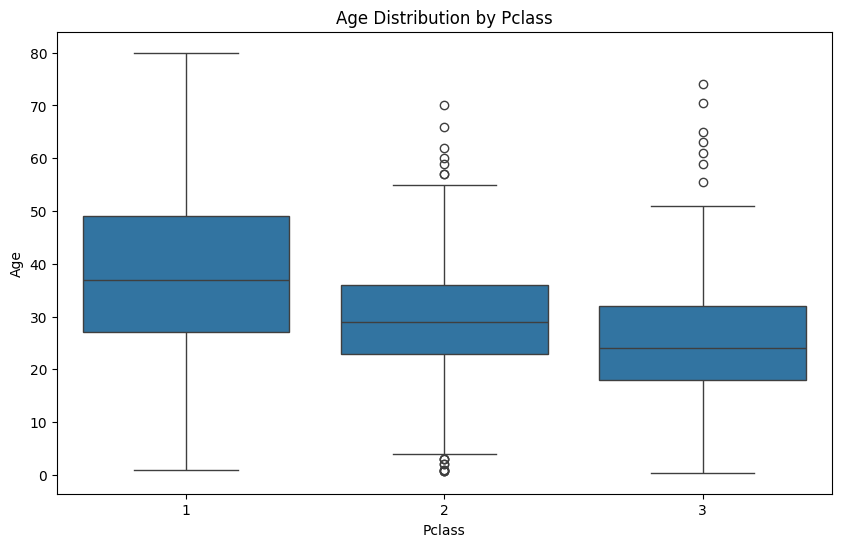

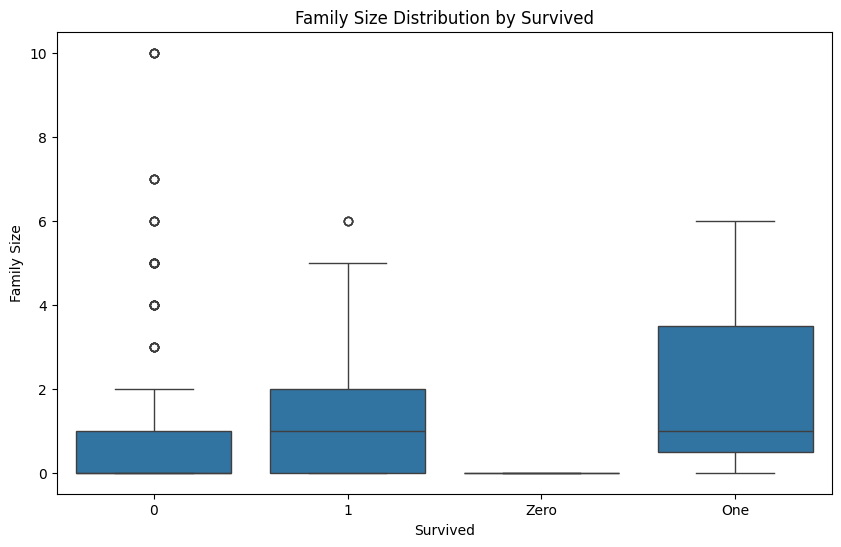

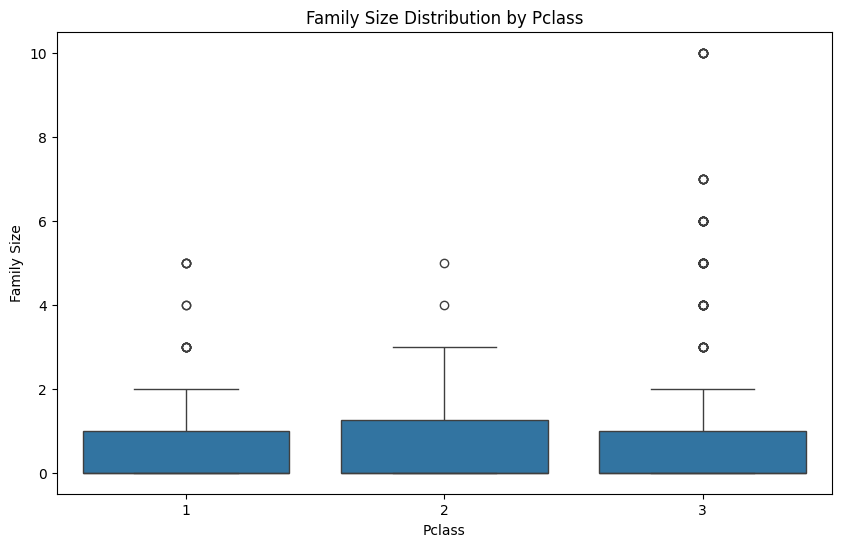

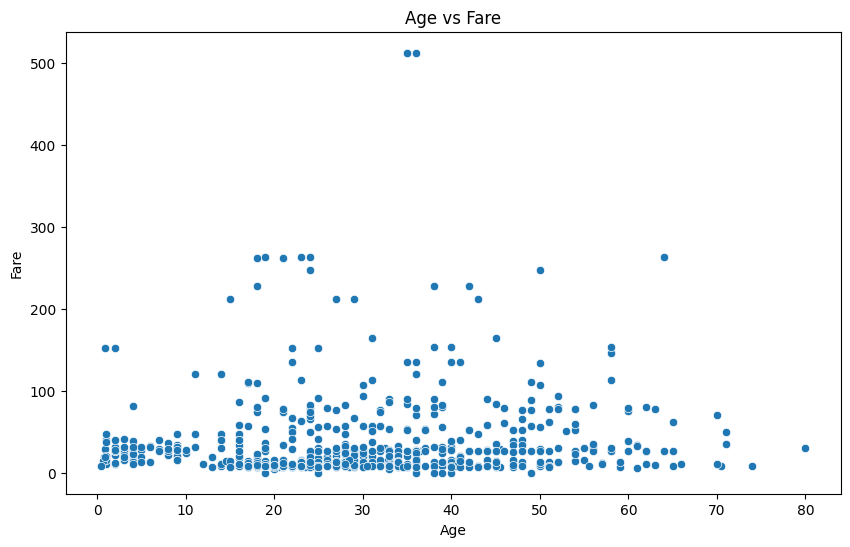

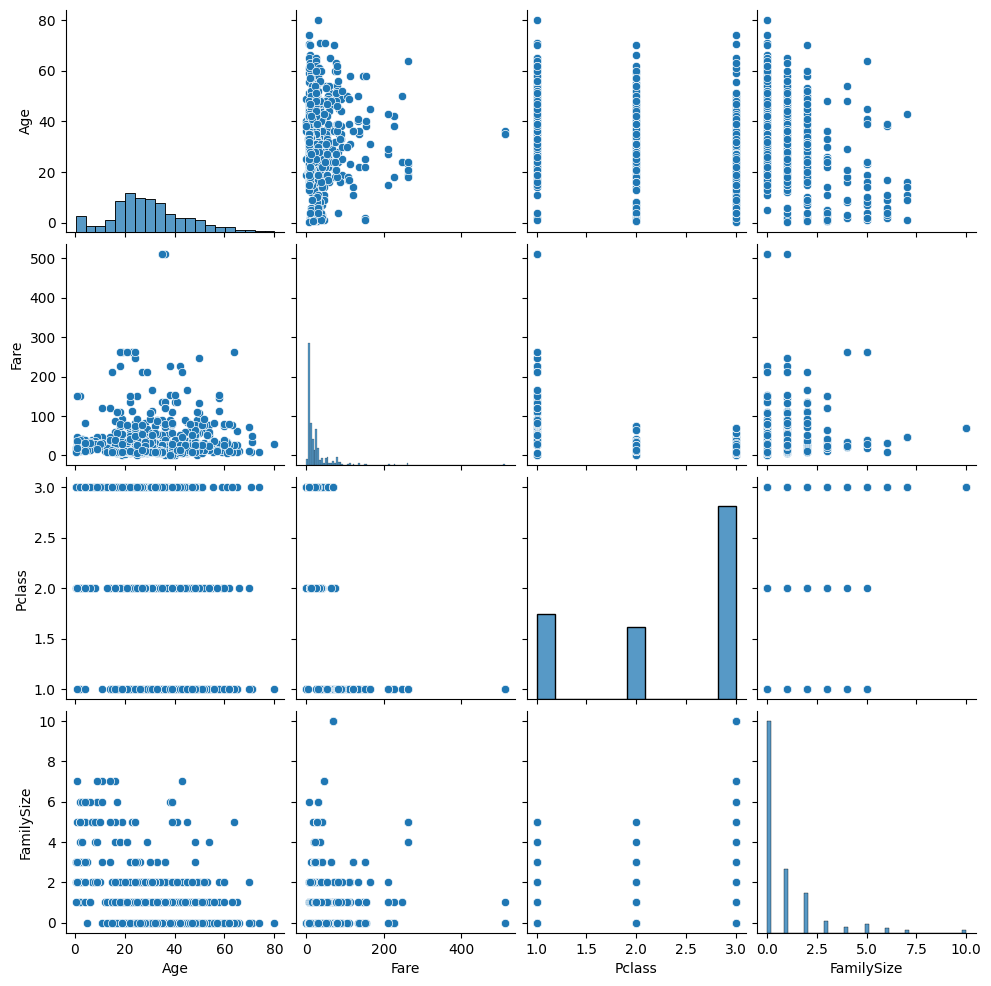

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("titanic.csv")


titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')


plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='FamilySize', data=titanic_df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='FamilySize', data=titanic_df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived', 'FamilySize']])
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("titanic.csv")

print(titanic_df.dtypes)

for col in titanic_df.columns:
    print(f"Unique values in '{col}':", titanic_df[col].unique())

numeric_columns = ['Fare', 'Age', 'Pclass', 'SibSp', 'Parch']
for col in numeric_columns:
    titanic_df[col] = pd.to_numeric(titanic_df[col], errors='coerce')

for col in titanic_df.columns:
    if titanic_df[col].dtype == 'object':
        print(f"Column '{col}' still contains non-numeric data.")

titanic_df.fillna(titanic_df[numeric_columns].mean(), inplace=True)  


correlation_matrix = titanic_df.corr()
print("Correlation matrix:\n", correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

age_fare_correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print("Correlation between Age and Fare:", age_fare_correlation)

pclass_fare_correlation = titanic_df['Pclass'].corr(titanic_df['Fare'])
print("Correlation between Pclass and Fare:", pclass_fare_correlation)

survived_fare_correlation = titanic_df['Survived'].corr(titanic_df['Fare'])
print("Correlation between Survived and Fare:", survived_fare_correlation)

age_survived_correlation = titanic_df['Age'].corr(titanic_df['Survived'])
print("Correlation between Age and Survived:", age_survived_correlation)





PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object
Unique values in 'PassengerId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 

ValueError: could not convert string to float: 'Zero'